Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Juan Gómez y Nicolás Guarín-Zapata 2020. Este material es parte del curso Modelación Computacional en el programa de Ingeniería Civil de la Universidad EAFIT.

# Modelación

## Introducción

La modelación matemática y la simulación son herramientas matemáticas
fundamentales en ciencia e ingenierı́a, y es válido afirmar que todo el mundo
las usa (incluso aquellos que no se percatan de ello). La pregunta no es si
usar estas herramienta o no, sino cómo usarlas de manera efectiva. Para tratar
con la complejidad de un sistema de interés, los ingenieros y cientı́ficos usan
versiones simplificadas del sistema, es decir, modelos del mismo [(Velten 2009)](#Referencias).

Es común encontrar palabras como sistema, modelo, y simulación muy
a menudo en la literatura. Sin el interés de formalizar mucho en el asunto
damos algunas definiciones para términos comúnmente encontrados:

- **Sistema:** Un sistema es un objeto o una colección de objetos de los
    cuáles queremos estudiar sus propiedades.

- **Experimento:** Estimular un sistema para evaluar su respuesta.

- **Modelo:** Abstracción de la realidad para un propósito especı́fico.

- **Simulación (experimento virtual):** Estimular un modelo del sistema de interés para evaluar su respuesta.


<div class="alert alert-warning">

**Mejor modelo**
    
Podemos decir que el mejor modelo es el modelo más simple que sirve
para entender un sistema y resolver problemas.
</div>


## Caída de un paracaidista

Para ilustrar algunos de los conceptos usaremos el salto de un paracaidista
hasta el momento en el que abre su paracaídas. Es decir, nos interesa
poder calcular la velocidad que lleva el mismo en cada instante de tiempo
desde que salta del avión hasta el momento de abrir su paracaídas.

Partamos de un diagrama de cuerpo libre
<center>
    <img src="img/paracaidas_cuerpo_libre.svg"
         alt="Diagrama de cuerpo libre para el paracaidista."
         style="width:100px">
</center>

O, matemáticamente
$$mg - F_a = ma\, ,$$

en donde la fuerza de arrastre está dada por

$$F_a = \frac{1}{2}\rho C_a A v^2\, .$$

Los parámetros de esta expresión son los siguientes:

- $g = 9.81 \text{ m/s}^2$ es la aceleración de la gravedad;

- $\rho$ es la densidad del fluido. Para el aire podemos tomar $\rho = 1.22 \text{ kg/m}³$;

- $C_a$ es el coeficiente de arrastre. Que para una persona puede tomarse como $C_a = 1.2$;

- $A$ es el área proyectada del paracaidista. Para el profesor, tenemos que $A=0.43 \text{ m}^2$; y

- $m$ es la masa del paracaidista. En el caso del profesor, tenemos que $m = 80 \text{ kg}$.

Esto nos lleva a la siguiente ecuación de movimiento

$$\frac{dv}{dt} = g - \frac{1}{2}\frac{\rho C_a A}{m} v^2\, .$$

A diferencia de la caída en la ausencia de un fluido, en este caso se tiene una
``velocidad terminal" ($v_\infty$)), es decir, una velocidad máxima. Esto
implica que la aceleración debe ser cero, 

$$\frac{d v_\infty}{dt} = 0\, ,$$

y por tanto

$$g = \frac{1}{2}\frac{\rho C_a A}{m} v^2_\infty\, ,\quad \text{o}\quad v_\infty = \sqrt{\frac{2 m g}{\rho C_a A}} \, .$$

Podemos, entonces, reescribir la ecuación diferencial como

$$\frac{dv}{dt} = g\left(1 - \frac{v^2}{v_\infty^2}\right)\, ,$$

e integrando tenemos

$$\int_0^v \frac{dv}{\left(1 - \frac{v^2}{v_\infty^2}\right)} = \int_0^t g dt\, ,$$

y luego de una manipulación algebraica, obtenemos

$$v(t) = v_\infty \tanh\left(\frac{gt}{v_\infty}\right)\, .$$


Si tomamos los datos dados anteriormente, tenemos una velocidad terminal


$$v_\infty = 49.94\, \text{ m/s} = 179.76\, \text{ km/h}\, ,$$

y la rapidez como función del tiempo sería

$$v(t) = 49.94\, \tanh(0.196\, t)\, \text{ m/s}\, .$$

A continuación vamos a graficar la velocidad para cada instante de tiempo
usando los parámetros dados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
%matplotlib notebook

In [3]:
# Parametros de entrada en SI
densidad = 1.22
gravedad = 9.81
coef_arr = 1.2
area = 0.43
masa = 80
vel_ter = np.sqrt(2*masa*gravedad/(densidad * coef_arr * area))

In [4]:
# Definicion arreglos
tiempo = np.linspace(0, 20, 100)
vel = vel_ter * np.tanh(gravedad * tiempo/vel_ter)

<IPython.core.display.Javascript object>


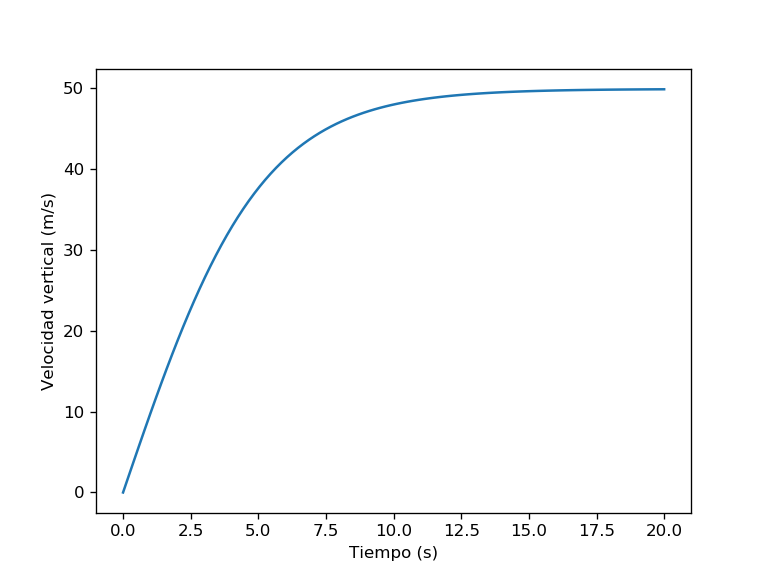

Text(0, 0.5, 'Velocidad vertical (m/s)')

In [5]:
# Graficacion
plt.figure()
plt.plot(tiempo, vel)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad vertical (m/s)")

Podemos agrupar estas instrucciones en una función para facilitar su posterior uso.

In [6]:
def graficar_vel(masa, area):
    """
    Grafica la velocidad en función del tiempo
    para un paracaidista con una masa y area
    transversal dadas.
    """
    plt.cla()
    densidad = 1.22
    gravedad = 9.81
    coef_arr = 1.2
    vel_ter = np.sqrt(2*masa*gravedad/(densidad * coef_arr * area))
    tiempo = np.linspace(0, 20, 100)
    vel = vel_ter * np.tanh(gravedad * tiempo/vel_ter)
    plt.plot(tiempo, vel)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Velocidad vertical (m/s)")
    plt.text(15, vel_ter/2,
             "masa ={:g} kg\narea={:g} m²".format(masa, area))
    return None

<IPython.core.display.Javascript object>


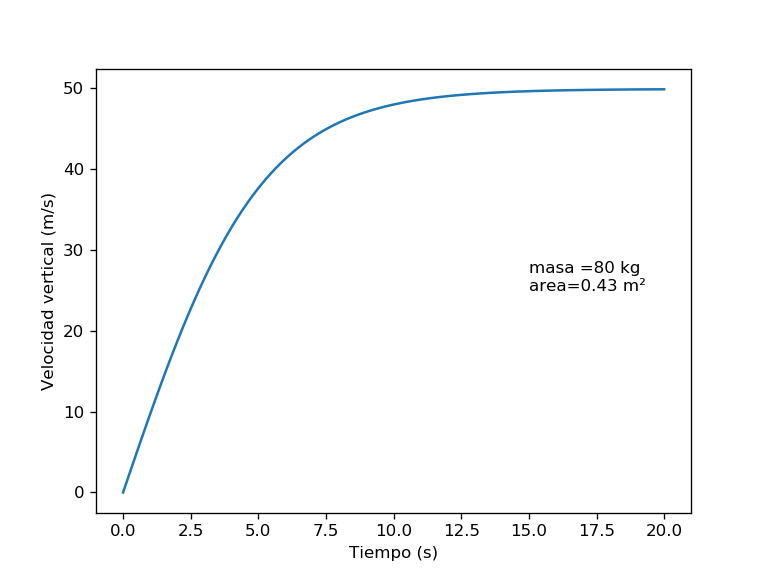

In [7]:
plt.figure()
graficar_vel(masa, area)

Y podemos graficar llamando a la función con sus dos parámetros, como se muestra
a continuación.

## Actividad de clase

La ecuación dada anteriormente permite modelar la velocidad para diferentes instantes de tiempo.
Partiendo de esta, y de la función ``graficar_vel()`` que permite realizar la gráfica
para diferentes valores de masa y área analice cuáles serían los requerimientos
para los integrantes de su equipo.

**Nota:** Tenga en cuenta que si ninguno de los integrantes ha hecho el curso de paracaidismo
deben saltar con un instructor. Pueden asumir que este tiene (aproximadamente)
el mismo tamaño y peso.


<div class="alert alert-warning">

1. Usar los deslizadores de la próxima celda para estudiar cuál sería la velocidad
   límite para cada uno de los integrantes de su equipo.
    
2. ¿Cuánto tiempo tarda en llegar la velocidad al 80%, 90% y 98% para cada integrante?

3. Responda estas preguntas al final de este Notebook usando celdas de texto
   con el formato correspondiente.
</div>


<IPython.core.display.Javascript object>


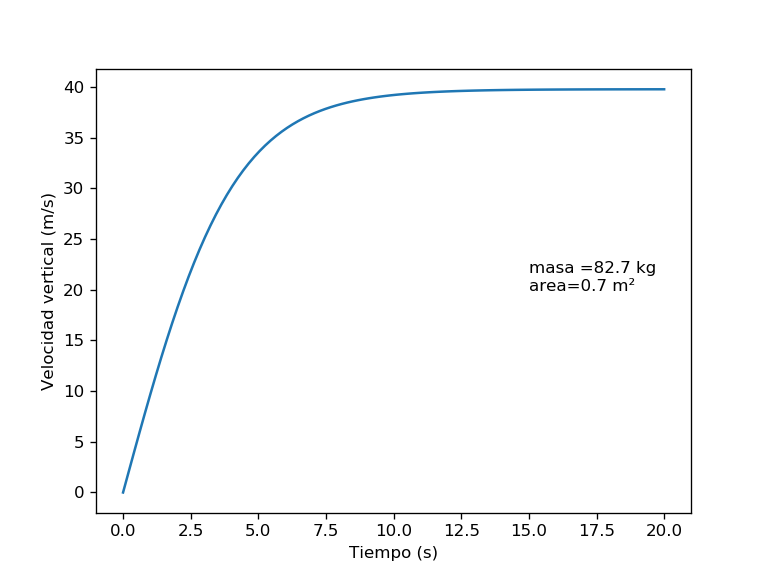

interactive(children=(FloatSlider(value=115.0, description='masa', max=200.0, min=30.0), FloatSlider(value=0.5…

In [8]:
plt.figure()
w = interact(graficar_vel,
             masa=(30.0,200.0),
             area=(0.1,1.0))


## Respuesta a la actividad

Acá pueden incluir sus respuestas.

Pueden usar listas:

- Un elemento de la lista.

- Otro elemento de la lista.


### Un subtítulo

Texto


## Referencias

- Kai Velten. Mathematical modeling and simulation: introduction for
scientists and engineers. John Wiley & Sons, 2009.